total_primary_signal_missing_count 15685083 20 % of things make up 34 %
total_cycle_second_missing_count 4466944 20 % of things make up 76 %
total_skipped_cycles_count 19315712
total_cycles_count 424284274
total_removed_cycles_count 13755057 20 % of things make up 95 %
total_invalid_cycle_length_count 8399133 20 % of things make up 94 %
total_invalid_transition_in_cycle_count 6027201 20 % of things make up 99 %
total_missing_observation_in_cycle_count 7049388 20 % of things make up 99 %
total_median_metric_of_all_things 2.0
total_median_metric_sp_of_all_things 0.0
total_median_metric_relative_green_distance_of_all_things 0.13400974025974027
total_median_metric_shifts_of_all_things 0.0


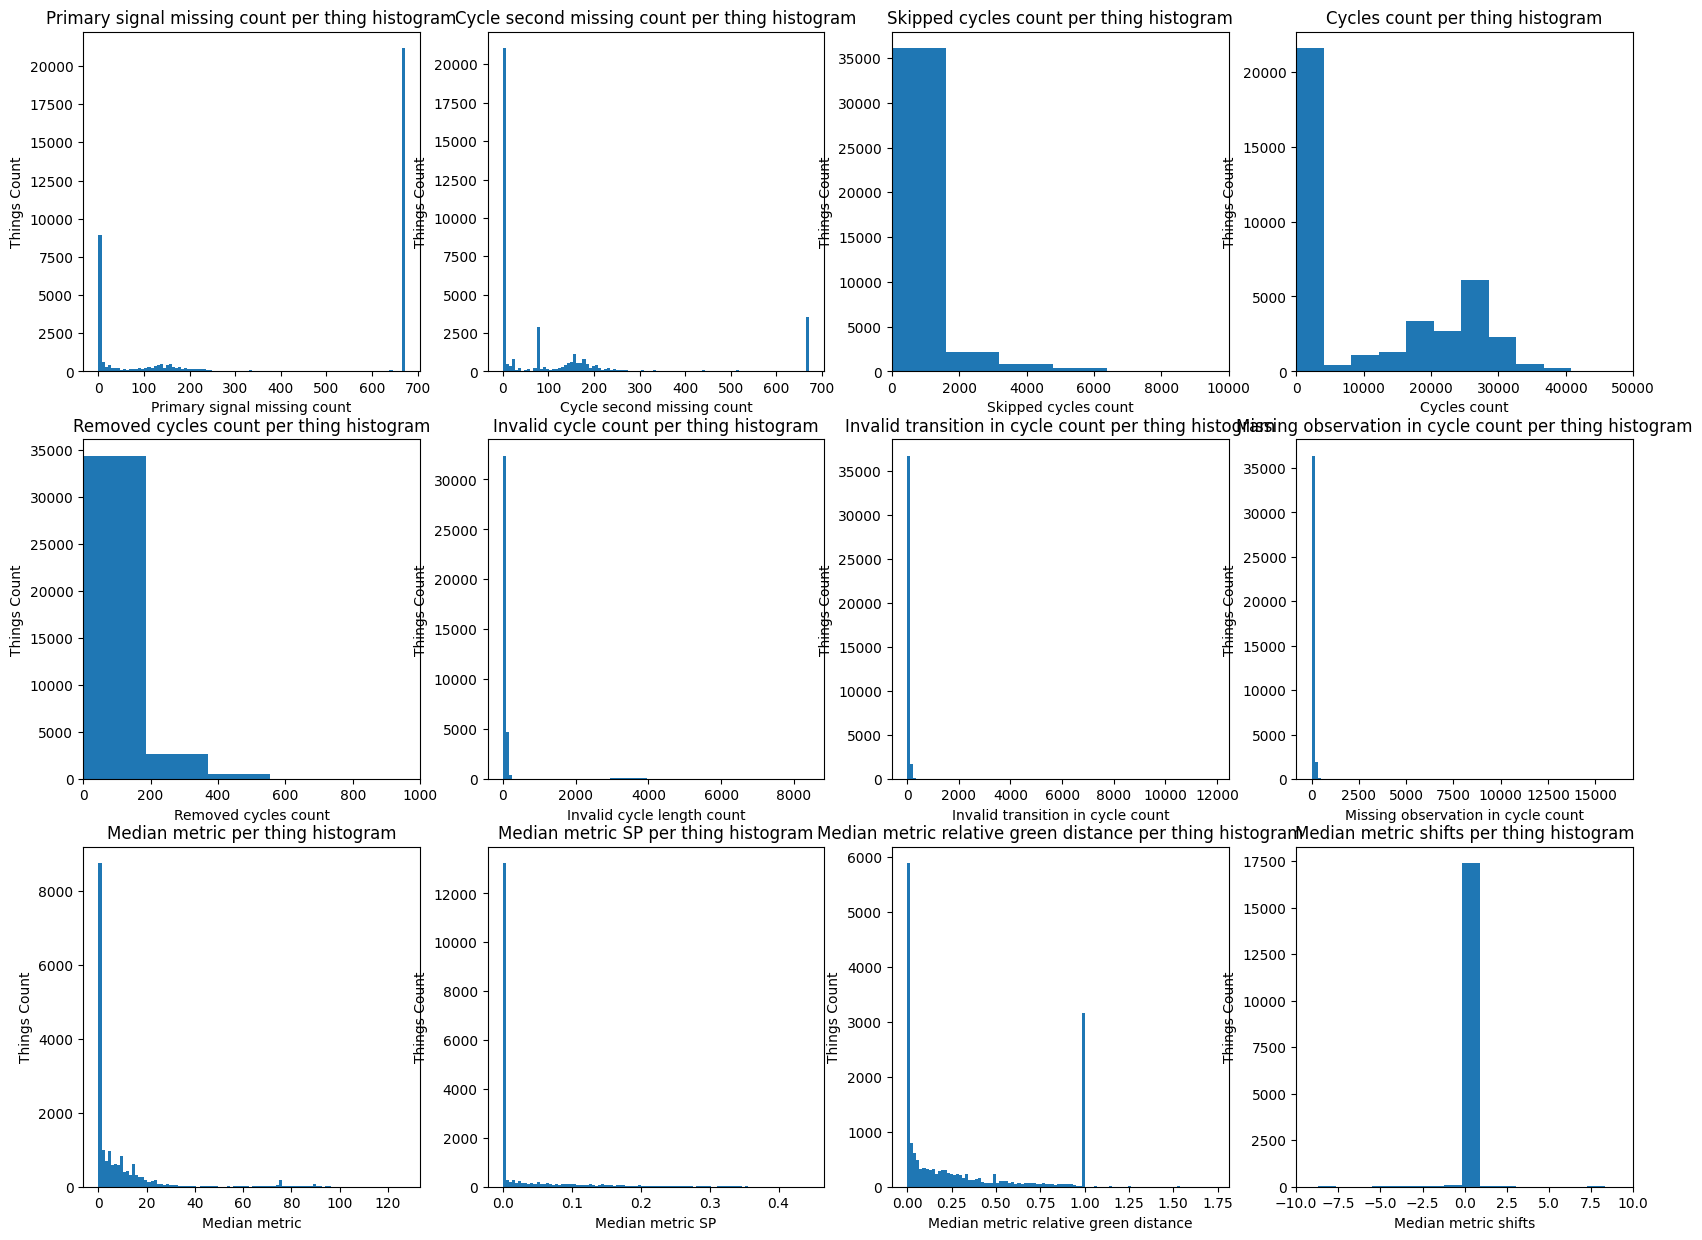

In [2]:
# Read processed_things.json

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
from os import listdir
from os.path import isfile, join
import collections
import matplotlib.gridspec as gridspec

with open('processed_things_2023_11_15.json') as f:
    processed_things = json.load(f)

# Stats
total_primary_signal_missing_count = 0
total_cycle_second_missing_count = 0
total_skipped_cycles_count = 0
total_cycles_count = 0
total_removed_cycles_count = 0
total_invalid_cycle_length_count = 0
total_invalid_transition_in_cycle_count = 0
total_missing_observation_in_cycle_count = 0
cycles_counts_per_thing = []
primary_signal_missing_counts_per_thing = []
cycle_second_missing_counts_per_thing = []
skipped_cycles_count_per_thing = []
removed_cycles_counts_per_thing = []
invalid_cycle_length_count_per_thing = []
invalid_transition_in_cycle_count_per_thing = []
missing_observation_in_cycle_count_per_thing = []

median_metrics_per_thing = []
median_metrics_sp_per_thing = []
median_metrics_relative_green_distance_per_thing = []
median_metrics_shifts_per_thing = []

    
for thing_name, thing in processed_things.items():
    total_primary_signal_missing_count += thing['PrimarySignalMissingCount']
    total_cycle_second_missing_count += thing['CycleSecondMissingCount']
    total_skipped_cycles_count += thing['TotalSkippedCycles']
    total_cycles_count += thing['TotalCyclesCount']
    total_removed_cycles_count += thing['TotalRemovedCycleCount']
    total_invalid_cycle_length_count += thing['TotalInvalidCycleLengthCount']
    total_invalid_transition_in_cycle_count += thing['TotalInvalidCycleTransitionCount']
    total_missing_observation_in_cycle_count += thing['TotalInvalidCycleMissingCount']
    
    primary_signal_missing_counts_per_thing.append(thing['PrimarySignalMissingCount'])
    cycle_second_missing_counts_per_thing.append(thing['CycleSecondMissingCount'])
    skipped_cycles_count_per_thing.append(thing['TotalSkippedCycles'])
    cycles_counts_per_thing.append(thing['TotalCyclesCount'])
    removed_cycles_counts_per_thing.append(thing['TotalRemovedCycleCount'])
    invalid_cycle_length_count_per_thing.append(thing['TotalInvalidCycleLengthCount'])
    invalid_transition_in_cycle_count_per_thing.append(thing['TotalInvalidCycleTransitionCount'])
    missing_observation_in_cycle_count_per_thing.append(thing['TotalInvalidCycleMissingCount'])
    
    total_metrics_of_thing = []
    total_metrics_sp_of_thing = []
    total_metrics_relative_green_distance_of_thing = []
    total_metrics_shifts_of_thing = []
    for day_idx in range(7):
        for hour_idx in range(24):
            if thing["Metrics"][day_idx][hour_idx] != -1.0:
                total_metrics_of_thing.append(thing["Metrics"][day_idx][hour_idx])
            if thing["MetricsSP"][day_idx][hour_idx] != -1.0:
                total_metrics_sp_of_thing.append(thing["MetricsSP"][day_idx][hour_idx])
            if thing["MetricsRelativeGreenDistance"][day_idx][hour_idx] != -1.0:
                total_metrics_relative_green_distance_of_thing.append(thing["MetricsRelativeGreenDistance"][day_idx][hour_idx])
            if thing["MedianShifts"][day_idx][hour_idx] != -999999:
                total_metrics_shifts_of_thing.append(thing["MedianShifts"][day_idx][hour_idx])
    if len(total_metrics_of_thing) > 0:
        median_metrics_per_thing.append(np.median(np.array(total_metrics_of_thing)))
    if len(total_metrics_sp_of_thing) > 0:
        median_metrics_sp_per_thing.append(np.median(np.array(total_metrics_sp_of_thing)))
    if len(total_metrics_relative_green_distance_of_thing) > 0:
        median_metrics_relative_green_distance_per_thing.append(np.median(np.array(total_metrics_relative_green_distance_of_thing)))
    if len(total_metrics_shifts_of_thing) > 0:
        median_metrics_shifts_per_thing.append(np.median(np.array(total_metrics_shifts_of_thing)))
    
primary_signal_missing_counts_per_thing.sort(reverse=True)
cycle_second_missing_counts_per_thing.sort(reverse=True)
skipped_cycles_count_per_thing.sort(reverse=True)
removed_cycles_counts_per_thing.sort(reverse=True)
invalid_cycle_length_count_per_thing.sort(reverse=True)
invalid_transition_in_cycle_count_per_thing.sort(reverse=True)
missing_observation_in_cycle_count_per_thing.sort(reverse=True)

PORTION = 0.2

primary_signal_missing_counts_per_thing_first_x_percent = primary_signal_missing_counts_per_thing[:int(len(primary_signal_missing_counts_per_thing) * PORTION)]
cycle_second_missing_counts_per_thing_first_x_percent = cycle_second_missing_counts_per_thing[:int(len(cycle_second_missing_counts_per_thing) * PORTION)]
removed_cycles_counts_per_thing_first_x_percent = removed_cycles_counts_per_thing[:int(len(removed_cycles_counts_per_thing) * PORTION)]
invalid_cycle_length_count_per_thing_first_x_percent = invalid_cycle_length_count_per_thing[:int(len(invalid_cycle_length_count_per_thing) * PORTION)]
invalid_transition_in_cycle_count_per_thing_first_x_percent = invalid_transition_in_cycle_count_per_thing[:int(len(invalid_transition_in_cycle_count_per_thing) * PORTION)]
missing_observation_in_cycle_count_per_thing_first_x_percent = missing_observation_in_cycle_count_per_thing[:int(len(missing_observation_in_cycle_count_per_thing) * PORTION)]

primary_signal_missing_counts_per_thing_first_x_percent_sum = sum(primary_signal_missing_counts_per_thing_first_x_percent)
cycle_second_missing_counts_per_thing_first_x_percent_sum = sum(cycle_second_missing_counts_per_thing_first_x_percent)
removed_cycles_counts_per_thing_first_x_percent_sum = sum(removed_cycles_counts_per_thing_first_x_percent)
invalid_cycle_length_count_per_thing_first_x_percent_sum = sum(invalid_cycle_length_count_per_thing_first_x_percent)
invalid_transition_in_cycle_count_per_thing_first_x_percent_sum = sum(invalid_transition_in_cycle_count_per_thing_first_x_percent)
missing_observation_in_cycle_count_per_thing_first_x_percent_sum = sum(missing_observation_in_cycle_count_per_thing_first_x_percent)

    
print('total_primary_signal_missing_count', total_primary_signal_missing_count, int(PORTION*100), '% of things make up', int((primary_signal_missing_counts_per_thing_first_x_percent_sum / total_primary_signal_missing_count)*100), '%')
print('total_cycle_second_missing_count', total_cycle_second_missing_count, int(PORTION*100),'% of things make up', int((cycle_second_missing_counts_per_thing_first_x_percent_sum / total_cycle_second_missing_count)*100), '%')
print('total_skipped_cycles_count', total_skipped_cycles_count)
print('total_cycles_count', total_cycles_count)
print('total_removed_cycles_count', total_removed_cycles_count, int(PORTION*100),'% of things make up', int((removed_cycles_counts_per_thing_first_x_percent_sum / total_removed_cycles_count)*100), '%')
print('total_invalid_cycle_length_count', total_invalid_cycle_length_count, int(PORTION*100),'% of things make up', int((invalid_cycle_length_count_per_thing_first_x_percent_sum / total_invalid_cycle_length_count)*100), '%')
print('total_invalid_transition_in_cycle_count', total_invalid_transition_in_cycle_count, int(PORTION*100),'% of things make up', int((invalid_transition_in_cycle_count_per_thing_first_x_percent_sum / total_invalid_transition_in_cycle_count)*100), '%')
print('total_missing_observation_in_cycle_count', total_missing_observation_in_cycle_count, int(PORTION*100),'% of things make up', int((missing_observation_in_cycle_count_per_thing_first_x_percent_sum / total_missing_observation_in_cycle_count)*100), '%')
print('total_median_metric_of_all_things', np.median(np.array(median_metrics_per_thing)))
print('total_median_metric_sp_of_all_things', np.median(np.array(median_metrics_sp_per_thing)))
print('total_median_metric_relative_green_distance_of_all_things', np.median(np.array(median_metrics_relative_green_distance_per_thing)))
print('total_median_metric_shifts_of_all_things', np.median(np.array(median_metrics_shifts_per_thing)))

histogram_data_to_plot = [
    {
        "data": primary_signal_missing_counts_per_thing,
        "title": "Primary signal missing count per thing histogram",
        "xlabel": "Primary signal missing count",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": cycle_second_missing_counts_per_thing,
        "title": "Cycle second missing count per thing histogram",
        "xlabel": "Cycle second missing count",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": skipped_cycles_count_per_thing,
        "title": "Skipped cycles count per thing histogram",
        "xlabel": "Skipped cycles count",
        "ylabel": "Things Count",
        "xlim": [0, 10000],
    },
    {
        "data": cycles_counts_per_thing,
        "title": "Cycles count per thing histogram",
        "xlabel": "Cycles count",
        "ylabel": "Things Count",
        "xlim": [0, 50000],
    },
    {
        "data": removed_cycles_counts_per_thing,
        "title": "Removed cycles count per thing histogram",
        "xlabel": "Removed cycles count",
        "ylabel": "Things Count",
        "xlim": [0, 1000],
    },
    {
        "data": invalid_cycle_length_count_per_thing,
        "title": "Invalid cycle count per thing histogram",
        "xlabel": "Invalid cycle length count",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": invalid_transition_in_cycle_count_per_thing,
        "title": "Invalid transition in cycle count per thing histogram",
        "xlabel": "Invalid transition in cycle count",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": missing_observation_in_cycle_count_per_thing,
        "title": "Missing observation in cycle count per thing histogram",
        "xlabel": "Missing observation in cycle count",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": median_metrics_per_thing,
        "title": "Median metric per thing histogram",
        "xlabel": "Median metric",
        "ylabel": "Things Count",
        "xlim": None,
    },
   {
        "data": median_metrics_sp_per_thing,
        "title": "Median metric SP per thing histogram",
        "xlabel": "Median metric SP",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": median_metrics_relative_green_distance_per_thing,
        "title": "Median metric relative green distance per thing histogram",
        "xlabel": "Median metric relative green distance",
        "ylabel": "Things Count",
        "xlim": None,
    },
    {
        "data": median_metrics_shifts_per_thing,
        "title": "Median metric shifts per thing histogram",
        "xlabel": "Median metric shifts",
        "ylabel": "Things Count",
        "xlim": [-10,10],
    }
]

number_of_charts = len(histogram_data_to_plot)
rows = int(number_of_charts / 4) + (1 if number_of_charts % 4 > 0 else 0)

fig, ax = plt.subplots(rows, 4, figsize=(20, 15))

for j in range(ax.shape[0]):
    for i in range(ax.shape[1]):
        index = i + j * ax.shape[1]
        if index >= number_of_charts:
            continue
        
        single_ax = ax[j][i]
        single_ax.hist(histogram_data_to_plot[index]["data"], bins=100)
        single_ax.set_xlabel(histogram_data_to_plot[index]["xlabel"])
        single_ax.set_ylabel(histogram_data_to_plot[index]["ylabel"])
        single_ax.set_title(histogram_data_to_plot[index]["title"])
        if histogram_data_to_plot[index]["xlim"] is not None:
            single_ax.set_xlim(histogram_data_to_plot[index]["xlim"])
        # single_ax.set_yscale('log')